In [10]:
"""
Assignment-1
NLP with Deep Learning
Kaustubh Agrawal
Roll no.22222
Topic: Co-occurrence Matrix (Count-based Word Embeddings)
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict
import nltk


In [ ]:
# Step 0: Load Dataset
# We will use the Reuters corpus (news dataset) from NLTK
nltk.download("reuters")
nltk.download("punkt")
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\kaust\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [3]:
# Step 1: Load dataset
# Use first 10 Reuters articles
corpus = " ".join([reuters.raw(file_id) for file_id in reuters.fileids()[:10]])
tokens = word_tokenize(corpus.lower())


In [11]:
print("Sample tokens:", tokens[:30])  # show first 30 words

Sample tokens: ['asian', 'exporters', 'fear', 'damage', 'from', 'u.s.-japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the', 'u.s.', 'and', 'japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'asia', "'s", 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict']


In [12]:
# Step 2: Distinct words
def get_distinct_words(tokens):
    """Return distinct word types from the corpus."""
    return list(set(tokens))

distinct_words = get_distinct_words(tokens)
print("\n(b) Number of distinct words in corpus:", len(distinct_words))
print("Example distinct words:", distinct_words[:20])


(b) Number of distinct words in corpus: 1040
Example distinct words: ['measure', 'quarter', '17', 'on', 'spokesman', 'friday', 'ended', 'ounces', 'semiconductors', 'were', 'ports', 'analyst', '50', 'broker', 'erosion', 'small', 'including', "''", 'dlrs', 'coal']


In [13]:
# Step 3: Build Co-occurrence Matrix
def build_cooccurrence_matrix(tokens, window_size=4):
    """
    Build a co-occurrence matrix.
    Each row = a word, Each column = how often context words appear nearby.
    Window size defines how many words before/after are considered.
    """
    vocab = list(set(tokens))
    vocab_size = len(vocab)
    word_to_id = {word: i for i, word in enumerate(vocab)}
    id_to_word = {i: word for word, i in word_to_id.items()}
    
    cooc_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word in enumerate(tokens):
        word_id = word_to_id[word]
        start = max(0, idx - window_size)
        end = min(len(tokens), idx + window_size + 1)
        for i in range(start, end):
            if i != idx:
                context_word = tokens[i]
                context_id = word_to_id[context_word]
                cooc_matrix[word_id, context_id] += 1
    return cooc_matrix, word_to_id, id_to_word

cooc_matrix, word_to_id, id_to_word = build_cooccurrence_matrix(tokens, window_size=4)
print("\n(c) Co-occurrence matrix shape:", cooc_matrix.shape)


(c) Co-occurrence matrix shape: (1040, 1040)


In [14]:
# Show part of the co-occurrence matrix for first 5 words
print("Sample (first 5x5 block of co-occurrence matrix):\n", cooc_matrix[:5, :5])

Sample (first 5x5 block of co-occurrence matrix):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


In [15]:
# Step 4: Dimensionality Reduction
def reduce_dimensions(matrix, k=2):
    """Reduce dimensions of the co-occurrence matrix using PCA."""
    pca = PCA(n_components=k)
    reduced = pca.fit_transform(matrix)
    return reduced

reduced_embeddings = reduce_dimensions(cooc_matrix, k=2)
print("\n(d) Reduced embeddings shape:", reduced_embeddings.shape)


(d) Reduced embeddings shape: (1040, 2)



(e) Plotting embeddings for first 30 words...


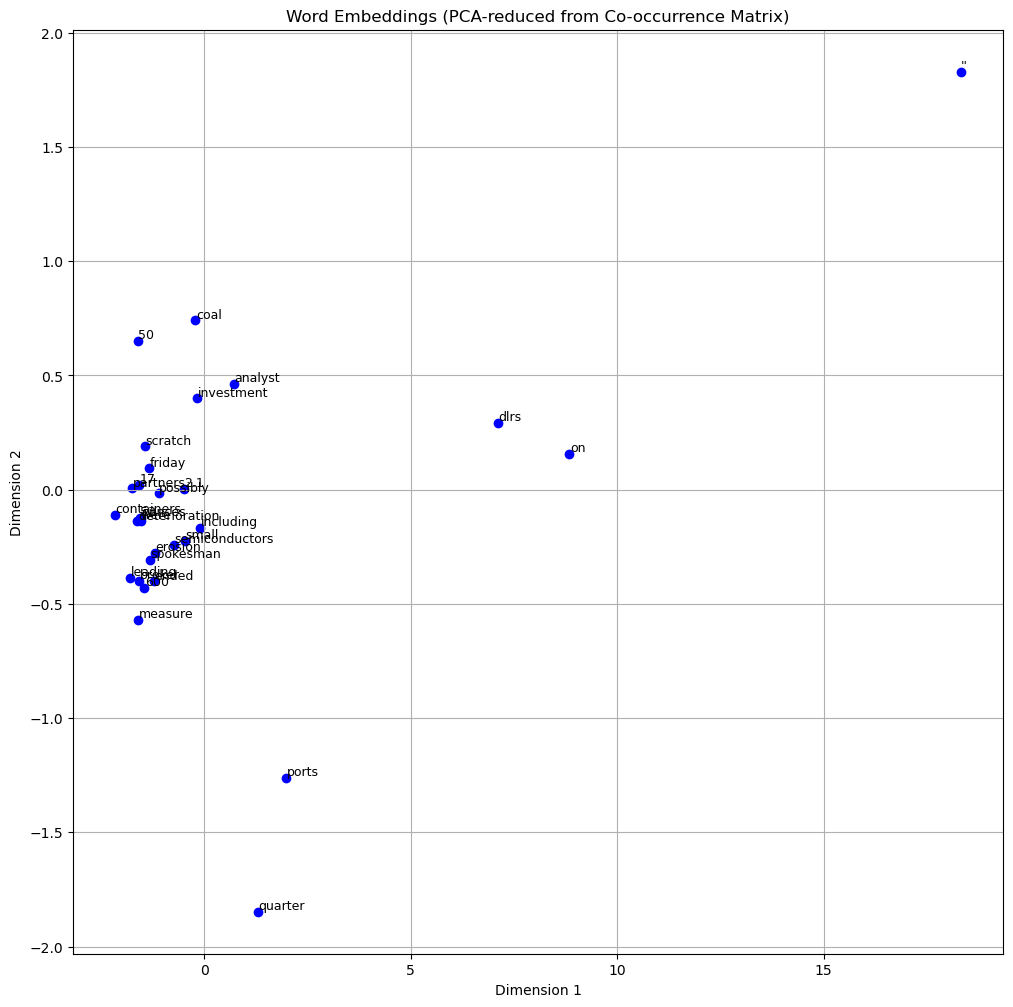

In [17]:
# Step 5: Plot Embeddings
def plot_embeddings(embeddings, id_to_word, words_to_plot=30):
    """
    Plot 2D embeddings of words after dimensionality reduction.
    Each point is annotated with its word.
    """
    plt.figure(figsize=(12, 12))
    for i, word in list(id_to_word.items())[:words_to_plot]:
        x, y = embeddings[i, 0], embeddings[i, 1]
        plt.scatter(x, y, color="blue")
        plt.annotate(word, (x+0.01, y+0.01), fontsize=9)
    plt.title("Word Embeddings (PCA-reduced from Co-occurrence Matrix)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

print("\n(e) Plotting embeddings for first 30 words...")
plot_embeddings(reduced_embeddings, id_to_word, words_to_plot=30)
